<a href="https://colab.research.google.com/github/wpwo98/IDS-CB35533/blob/main/IDS_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k Nearest Neighbor Classifier

## kNN 도미 빙어 분류기 (bream smelt classifier)

### 도미 빙어 자료 (bream smelt data)

아래와 같이 도미(bream)와 빙어(smelt)의 길이와 무게 자료가 주어졌다.
(Length and weight data for bream and smelt are provided below.)


In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

산점도(scatter plot)를 그려보자
(Draw a scatter plot)

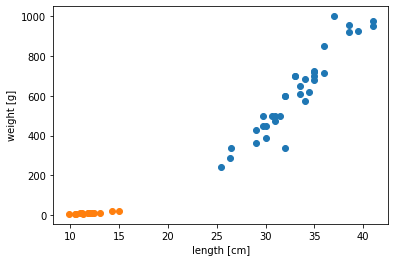

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length [cm]')
plt.ylabel('weight [g]')
plt.show()

### dataset 생성 (construct dataset)

도미(bream) 자료와 빙어(smelt)자료를 합쳐 fish_data를 생성
(combine bream and smelt data to create fish_data)

In [ ]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


fish_data의 각행에 해당하는 레이블(label)을 생성하자. 1은 도미, 0은 빙어를 나타낸다.
(Add label to the fish_data; 1 being bream, 0 being smelt)

In [ ]:
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### kNN using Scikit-learn

사이킷런의 KNeighborsClassifier 를 사용해서 k=3인 kNN분류기를 만들자.
(Using KNeighborsClassifier in Scikit-learn, make kNN classifier with k=3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
kn.fit(fish_data, fish_target)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

생성한 분류기를 사용하여 새로운 물고기의 종류를 예측해보자.
변수 newFish는 새로운 물고기의 [길이, 무게] 값을 갖는다.
(Predict the species of fish with the classifier. The input variable newFish is in the form of [length, weight])

In [ ]:
newFish = [25, 200]
kn.predict([newFish])

array([1])

새로운 물고기의 예측된 종류는 1 즉 도미이다.
(The result indicates that the newFish is bream.)

선택된 이웃과의 거리를 살펴보자.
(Check the distances with selected neighbors)

In [ ]:
dist, idx = kn.kneighbors([newFish]) # returns a list of lists
nn_dist = dist[0]
nn_idx = idx[0]
print(nn_dist)


[ 42.00190472  90.0093884  140.00803548]


데이터셋에서 선택된 이웃 인덱스 확인
(Indices of the selected neighbors)

In [ ]:
print(nn_idx)


[0 1 2]


선택된 이웃의 레이블을 확인해보자
(Labels of the selected neighbors)

In [ ]:
import numpy as np
labels = np.array(fish_target)
labels[nn_idx]

array([1, 1, 1])

선택된 이웃들의 레이블이 아래와 같이 도미가 더 많음을 확인할 수 있다.
(You can see the majority of the labels are 1)



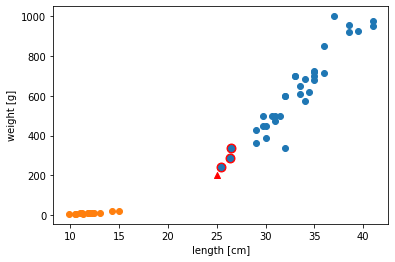

In [ ]:
plt.scatter(np.array(fish_data)[nn_idx][:,0],np.array(fish_data)[nn_idx][:,1], 
            facecolors = 'none', c='r', s=80)
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(newFish[0], newFish[1],marker='^', c='r')
plt.xlabel('length [cm]')
plt.ylabel('weight [g]')
plt.show()

### 동작확인 (Checking the results)

사이킷런의 knn이 우리가 생각한대로 동작하는지 확인해보자.
선택된 이웃들과의 거리를 계산해보자
(Make a new array of fish_data for the sake of convenience in comparison later)

In [ ]:
fisharr = np.array(fish_data)
print(fisharr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


fishdata의 각 관측값과 새로운 물고기 데이터 사이의 거리 계산
(Calculate the distance between newFish and each row in fishdata)

In [ ]:
diff = fisharr - newFish
diffsq = diff * diff
dist = np.sqrt(np.sum(diffsq, axis=1))

향후 사이킷런 결과와 비교하기 위해 데이터에 index열 추가.
(Add index column for the comparison later)


In [ ]:
idx_dist = np.array(range(0,len(diff)))
idx_dist
data = np.vstack((idx_dist,dist)).T
print(data)

[[  0.          42.00190472]
 [  1.          90.0093884 ]
 [  2.         140.00803548]
 [  3.         163.04907237]
 [  4.         230.03477998]
 [  5.         250.0441761 ]
 [  6.         300.03681441]
 [  7.         190.06577809]
 [  8.         250.049995  ]
 [  9.         300.05414511]
 [ 10.         275.06544676]
 [ 11.         300.059994  ]
 [ 12.         300.0704084 ]
 [ 13.         140.17489076]
 [ 14.         400.06124531]
 [ 15.         400.06124531]
 [ 16.         500.0639959 ]
 [ 17.         500.0639959 ]
 [ 18.         410.08810029]
 [ 19.         450.08027062]
 [ 20.         375.10798445]
 [ 21.         485.08349797]
 [ 22.         420.10742674]
 [ 23.         480.10415537]
 [ 24.         500.09999   ]
 [ 25.         525.09522946]
 [ 26.         520.09614496]
 [ 27.         514.11769081]
 [ 28.         650.09307026]
 [ 29.         800.08999494]
 [ 30.         720.12655138]
 [ 31.         755.12068572]
 [ 32.         725.1449855 ]
 [ 33.         775.1651437 ]
 [ 34.        

거리순으로 정렬
(Sort by distance)

In [ ]:
sorted = data[data[:,1].argsort()]
print(sorted[0:3,])

[[  0.          42.00190472]
 [  1.          90.0093884 ]
 [  2.         140.00803548]]


In [ ]:
nn_idx, nn_dist

(array([0, 1, 2]), array([ 42.00190472,  90.0093884 , 140.00803548]))

### Evaluation
사이킷런의 KNeighborsClassifier는 score 메소드를 통해서 분류기의 Accuracy를 제공함. 
k를 2부터 49까지 변경시켜 가면서 분류기의 Accuracy를 살펴보자.
(the score method provides the accuracy of the classifier. See how it changes from k=2 to 49)

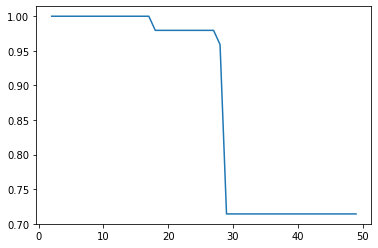

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

score = []
for k in range(2,50):
  kn.n_neighbors = k
  score.append(kn.score(fish_data,fish_target))

plt.plot(range(2,50), score)
plt.show()


In [ ]:
kn.n_neighbors = 29
print(kn.score(fish_data,fish_target))
print(35/49)

0.7142857142857143
0.7142857142857143


k=29 보다 큰 경우, 즉 항상 인접이웃 중에서 도미의 숫자가 많아질 경우, 모든 데이터를 도미로 예측하게 되어 정확도가 35/49가 된다.
(When k is larger than 29, i.e., the majority of neighbors is always bream, the classifier predicts any input as a bream, resulting in the accuracy of 35/49.)

## kNN 도미 빙어 분류기 2 (kNN bream smelt classifier 2)





### Dividing training set and test set

사이킷런의 train_test_split 메소드를 이용해서 훈련/테스트 데이터 분할
이 메소드는 전체 데이터에서 무작위로 일부 데이터 (기본값 25%) 를 테스트 세트로 떼어냄
(Using the train_test_split method, we can split the dataset into train and test datasets. The method randomly chooses some (default is 25%) of data as a test set.)


In [ ]:
from sklearn.model_selection import train_test_split

fish_data = np.array(fish_data)
fish_target = np.array(fish_target)

# train_input, test_input, train_target, test_target = train_test_split(
#     fish_data, fish_target, random_state = 42
# )
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state = 42)

print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


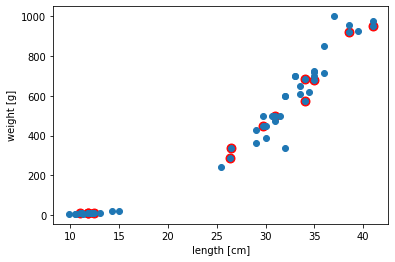

In [ ]:
plt.scatter(test_input[:,0],test_input[:,1], 
            facecolors = 'none', c='r', s=80)
plt.scatter(fish_data[:,0],fish_data[:,1])
plt.xlabel('length [cm]')
plt.ylabel('weight [g]')
plt.show()

훈련 데이터와 테스트 데이터에 빙어와 도미가 고르게 분포한 것을 확인할 수 있다.
(Bream and smelts are properly distributed in both datasets.)

### Evaluation

테스트 데이터를 정확히 분류하는 것을 확인할 수 있다.
(All entries in test_input are correctly classified with the classifier trained on the train dataset.)

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

그렇다면 아래 새로운 물고기는 어떤 종일까?
(Let's consider an unknown fish data)

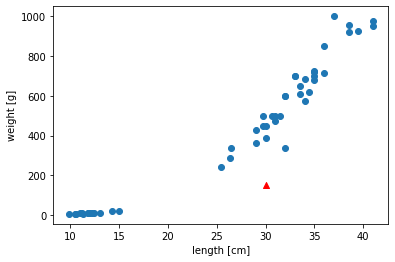

In [ ]:
newFish = [30, 150]
plt.scatter(fish_data[:,0],fish_data[:,1])
plt.scatter(newFish[0], newFish[1],marker='^', c='r')
plt.xlabel('length [cm]')
plt.ylabel('weight [g]')
plt.show()

In [ ]:
print(kn.predict([newFish]))

[0]


도미(1)인 것 같은데 빙어(0)로 분류되었다. 아래 산점도를 보면 근접 이웃으로 빙어쪽 샘플이 더 많이 선택된 것을 볼 수 있다.
뭐가 문제인가?
자세히 보면 각 특성(길이, 무게)의 범위가 다르다. 
(At a glance, it seemed a bream but was classified as smelt.
That's because we did not take the scale of each feature into consideration.)

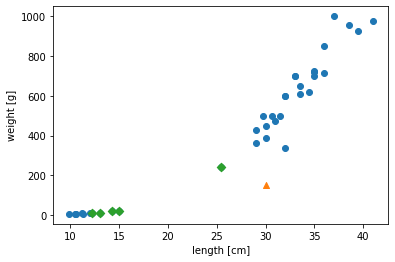

In [ ]:
dist, idx = kn.kneighbors([newFish])
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(newFish[0], newFish[1],marker='^')
plt.scatter(train_input[idx,0], train_input[idx,1], marker = 'D')
plt.xlabel('length [cm]')
plt.ylabel('weight [g]')
plt.show()

x 축과 y 축의 범위를 동일하게 지정해보면 ...
(if we draw the scatter plot with rectified axis...)

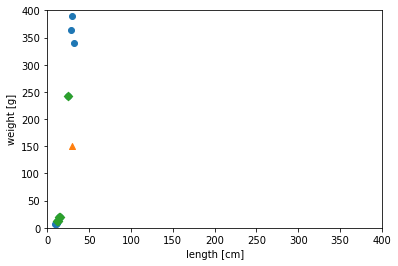

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(newFish[0], newFish[1],marker='^')
plt.scatter(train_input[idx,0], train_input[idx,1], marker = 'D')
plt.xlim((0,400))
plt.ylim((0,400))
plt.xlabel('length [cm]')
plt.ylabel('weight [g]')
plt.show()

### Solution1: data preprocessing

위에서 각 특성(무게,길이)의 스케일이 다름을 보았다.
고쳐보자.
(We now noticed that the scales for each feature are not equal. Let's fix it)

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


각 특성의 평균과 표준편차를 구했다. 이제 평균과 표준편차를 이용해 트레이닝 데이터를 표준화하자. 
(We can use the means and standard deviations of each feature to standardize the training dataset)

In [ ]:
train_scaled = (train_input - mean) / std

표준화(standardization)된 데이터을 이용해 분류기를 만들자.
(Now we make a classifier with the standarized dataset)

In [ ]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

newFish에 대해 다시 예측해보자. 이때 중요한 것은 새로운 물고기의 특성들도 표준화하여 입력해주어야 한다.
(Let's predict newFish again. Note that we also need to apply the standardization to the input data)

In [ ]:
newFish_scaled = (newFish - mean) / std
print(kn.predict([newFish_scaled]))

[1]


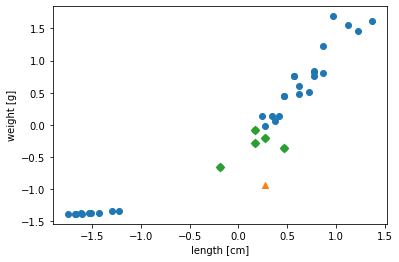

In [ ]:
dist, idx = kn.kneighbors([newFish_scaled])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(newFish_scaled[0], newFish_scaled[1], marker = '^')
plt.scatter(train_scaled[idx,0],train_scaled[idx,1], marker = 'D')
plt.xlabel('length [cm]')
plt.ylabel('weight [g]')
plt.show()

### Solution2: changing distance metric

또는 특성들의 공분산을 이용하여 스케일 문제를 해결할 수 있다. 
kNN의 거리 측정 방식을 유클리디안 거리에서 마할라노비스 거리로 바꿔보자.
(Instead of applying standardized data, we can simply change the distance metric to Mahalanobis distance, which incorporates the covariance matrix of features.)

In [ ]:
kn = KNeighborsClassifier(algorithm = 'brute', metric = 'mahalanobis', metric_params={'VI': np.linalg.inv(np.cov(train_input.T)).T})
kn.fit(train_input, train_target)
print(kn.predict([newFish]))

[1]


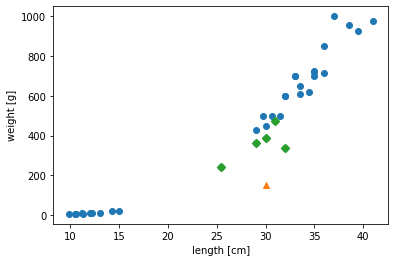

In [ ]:
dist, idx = kn.kneighbors([newFish])
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(newFish[0], newFish[1], marker = '^')
plt.scatter(train_input[idx,0],train_input[idx,1], marker = 'D')
plt.xlabel('length [cm]')
plt.ylabel('weight [g]')
plt.show()